<a href="https://colab.research.google.com/github/YuliaLoburets/ML_learning/blob/main/HW_2_1_%D0%9B%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F_%D0%B2%D1%96%D0%B4_%D0%B1%D0%B0%D0%B3%D0%B0%D1%82%D1%8C%D0%BE%D1%85_%D0%B7%D0%BC%D1%96%D0%BD%D0%BD%D0%B8%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [ ]:
car_df = pd.read_csv('drive/MyDrive/ML/cars.csv')
car_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [ ]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
?pd.DataFrame.info

In [ ]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [ ]:
categ_columns = car_df.select_dtypes('object').columns.to_list()
print(categ_columns)

['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type']


In [ ]:
len(categ_columns)

5

In [ ]:
def unique_values(column):
  n_values= len(car_df[column].unique())
  return n_values

In [ ]:
dict = {}
for i in categ_columns:
  dict[i] = unique_values(column=i)
print(dict)


{'Brand': 11, 'Model': 58, 'Fuel_Type': 2, 'Transmission': 2, 'Owner_Type': 3}


In [ ]:
numeric_columns = car_df.select_dtypes('int').columns.to_list()
print(numeric_columns)

['Car_ID', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']


In [ ]:
len(numeric_columns)

8

**Висновок**:

1. Датасет має 8 числових колонок та 5 категоріальних, із яких 2 бінарні - 'Fuel_Type' та 'Transmission', 1 колонка мультикатегоріальна з порядком - 'Owner_Type', 2 колонки мультикатегоріальні без порядку 'Brand', 'Model'.

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
inputs = car_df[['Car_ID', 'Brand', 'Model', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']]
target = car_df['Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=12)

<Axes: >

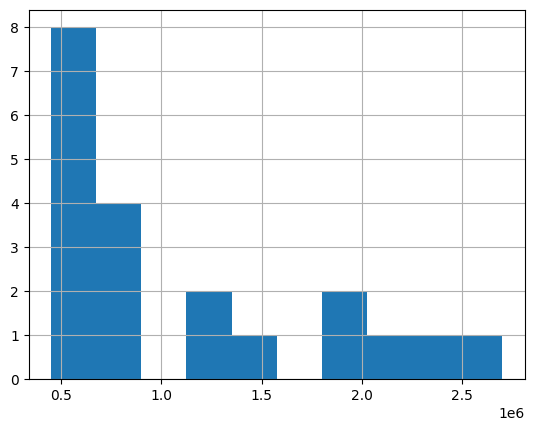

In [ ]:
y_test.hist()

<Axes: >

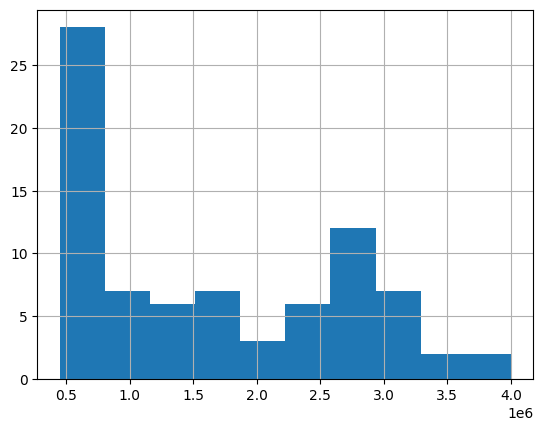

In [ ]:
y_train.hist()

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [ ]:
car_df['Fuel_Type'].value_counts()

,count
Fuel_Type,
Petrol,52
Diesel,48


In [ ]:
car_df['Transmission'].value_counts()

,count
Transmission,
Automatic,57
Manual,43


In [ ]:
fuel_dict = {'Petrol': 1, 'Diesel': 0}
transmission_dict = {'Automatic': 1, 'Manual': 0}

In [ ]:
X_train['fuel_code'] = X_train['Fuel_Type'].map(fuel_dict)
X_train['transmission_code'] = X_train['Transmission'].map(transmission_dict)

In [ ]:
X_test['fuel_code'] = X_test['Fuel_Type'].map(fuel_dict)
X_test['transmission_code'] = X_test['Transmission'].map(transmission_dict)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])


**Спостереження**:

Cтворилась нова колонка з порядковими значення від 0 до 2 для категорія колонки Owner_Type, де значення First має код 0, Second - 1, Third - 2.

In [ ]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(X_train[['Brand']])

OneHotEncoder()

In [ ]:
enc.categories_[0]

array(['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
       'Mercedes', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)

In [ ]:
one_hot = enc.transform(X_train[['Brand']]).toarray()
one_hot[:5,:]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

In [ ]:
X_train[enc.categories_[0]] = one_hot

In [ ]:
X_train.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
one_hot_test = enc.transform(X_test[['Brand']]).toarray()

In [ ]:
one_hot_test.shape

(20, 11)

In [ ]:
X_test[enc.categories_[0]] = one_hot_test

Очікуваний результат після трансформацій:

In [ ]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,fuel_code,transmission_code,Owner_Type_Codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,fuel_code,transmission_code,Owner_Type_Codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [ ]:
X_train_int = X_train.select_dtypes(['int','float'])

In [ ]:
X_train_int = X_train_int.drop(columns=['Car_ID'])

In [ ]:
X_train_int.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,fuel_code,transmission_code,Owner_Type_Codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
83,2019,22000,18,1498,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
55,2018,28000,17,1968,187,5,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,2018,28000,15,1984,241,5,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,2017,32000,18,1598,103,5,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19,2017,26000,12,1991,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
df_train = pd.concat([X_train_int,y_train],axis=1)

<Axes: >

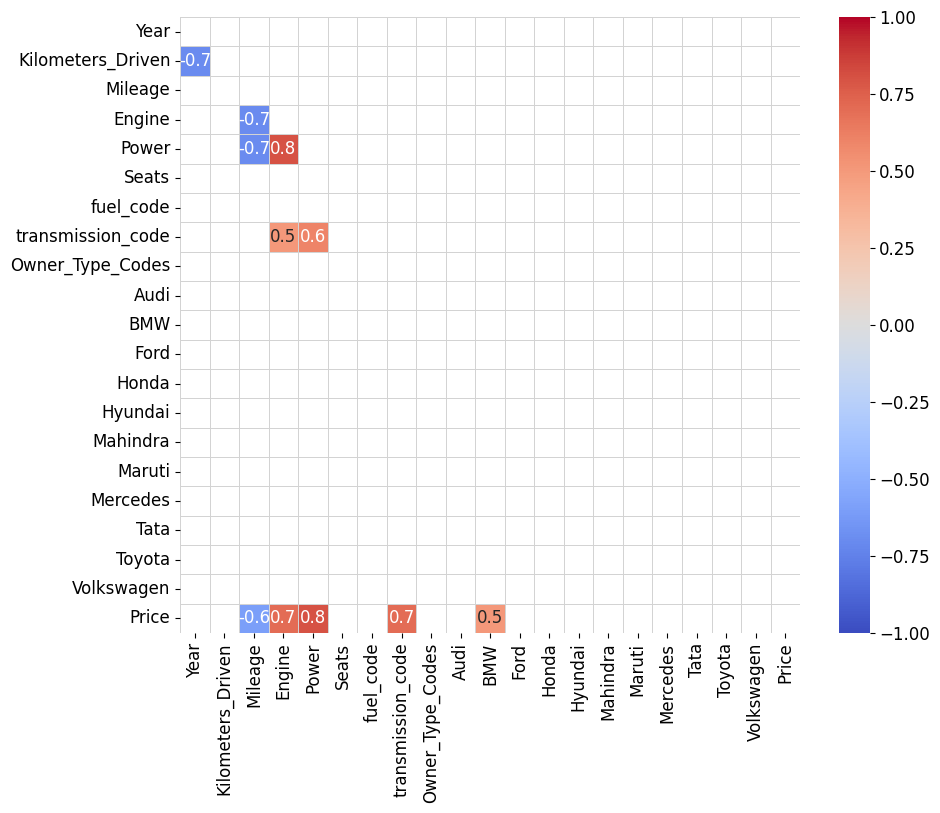

In [ ]:
corr = df_train.corr(method='pearson').round(1)
plt.figure(figsize = (10,8))
plt.rcParams.update({'font.size': 12})
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr[(corr>=0.5) | (corr<=-0.5)], vmin = -1, vmax = 1, center = 0, linewidths=0.5, linecolor='lightgrey', annot=True, cmap = 'coolwarm', mask=mask)

**Спостереження**:

Цільова зміна має найбільшу позитивну кореляцію з типом марки авто BMW, з колонками transmission_code, Power, Engine. Та найбільш негативно корелює з колонкою Mileage.

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [ ]:
X_test_int = X_test.select_dtypes(['int','float'])

In [ ]:
X_test_int = X_test_int.drop(columns = ['Car_ID'])

In [ ]:
X_test_int.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,fuel_code,transmission_code,Owner_Type_Codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
17,2016,38000,15,1395,148,5,1,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,2019,26000,20,1086,68,5,1,0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
92,2017,32000,18,1598,103,5,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14,2020,18000,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
68,2019,26000,20,1194,94,5,1,0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
linear_reg = LinearRegression()

In [ ]:
model = linear_reg.fit(X_train_int, y_train)

In [ ]:
predictions_test = model.predict(X_test_int)
loss = np.sqrt(mean_squared_error(y_test, predictions_test))
print('Test Loss:', loss)

Test Loss: 259601.26542723514


In [ ]:
r2 = r2_score(y_test, predictions_test)
print('R2_test:', r2)

R2_test: 0.8509832680786693


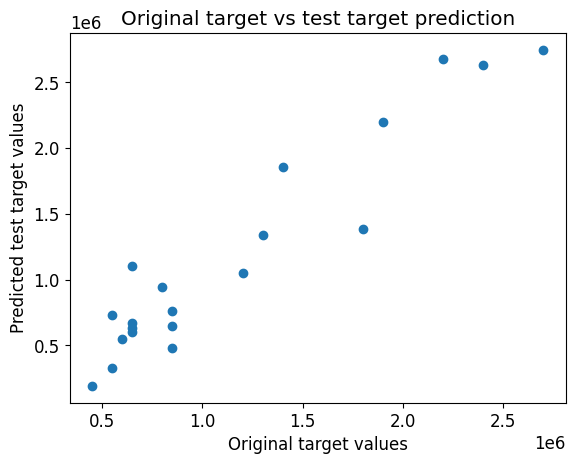

In [ ]:
plt.scatter(y_test, predictions_test)
plt.title('Original target vs test target prediction')
plt.xlabel('Original target values')
plt.ylabel('Predicted test target values')
plt.show()

In [ ]:
prediction_train = model.predict(X_train_int)
loss_train = np.sqrt(mean_squared_error(y_train, prediction_train))
print('Train Loss:', loss_train)

Train Loss: 210342.80162046422


In [ ]:
r2_train = r2_score(y_train, prediction_train)
print('R2_test:', r2_train)

R2_test: 0.9586083106020877


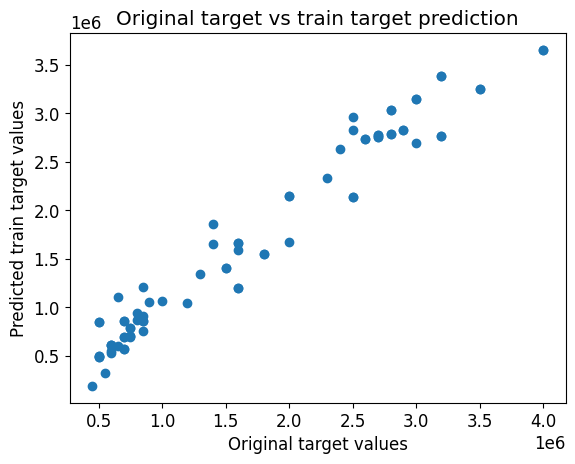

In [ ]:
plt.scatter(y_train, prediction_train)
plt.title('Original target vs train target prediction')
plt.xlabel('Original target values')
plt.ylabel('Predicted train target values')
plt.show()


In [ ]:
car_df.Price.max()

4000000

In [ ]:
car_df.Price.min()

450000

In [ ]:
car_df.Price.median()

1300000.0

**Висновок**:
1) RMSE моделі на тестових данних трохи вище , ніж моделі на тренувальних данних, але в цілому показує непоганий результат.

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
columns_to_scale = ['Year','Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Seats']

In [ ]:
scaler = StandardScaler().set_output(transform='pandas')

In [ ]:
scaler.fit(X_train_int[columns_to_scale])

StandardScaler()

In [ ]:
scaler.mean_.tolist()

[2018.3625, 28362.5, 17.0625, 1910.7375, 166.8875, 5.225]

In [ ]:
scaled_train = scaler.transform(X_train_int[columns_to_scale])

In [ ]:
np.set_printoptions(suppress=True, precision=6)

In [ ]:
scaled_train.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats
83,0.568813,-0.693871,0.274862,-0.628491,-0.231967,-0.303562
55,-0.323442,-0.039533,-0.018324,0.087196,0.247012,-0.303562
26,-0.323442,-0.039533,-0.604696,0.111560,0.910213,-0.303562
54,-1.215697,0.396692,0.274862,-0.476217,-0.784634,-0.303562
19,-1.215697,-0.257646,-1.484254,0.122219,0.910213,-0.303562


In [ ]:
X_train_encoded = X_train_int[X_train_int.columns.difference(columns_to_scale)]

In [ ]:
X_train_encoded.head()

,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Owner_Type_Codes,Tata,Toyota,Volkswagen,fuel_code,transmission_code
83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,1
55,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
26,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1,1


In [ ]:
X_train_scaled = pd.concat([scaled_train,X_train_encoded],axis=1)

In [ ]:
X_train_scaled.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Owner_Type_Codes,Tata,Toyota,Volkswagen,fuel_code,transmission_code
83,0.568813,-0.693871,0.274862,-0.628491,-0.231967,-0.303562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,1
55,-0.323442,-0.039533,-0.018324,0.087196,0.247012,-0.303562,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
26,-0.323442,-0.039533,-0.604696,0.111560,0.910213,-0.303562,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
54,-1.215697,0.396692,0.274862,-0.476217,-0.784634,-0.303562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0
19,-1.215697,-0.257646,-1.484254,0.122219,0.910213,-0.303562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1,1


In [ ]:
model_scaled = linear_reg.fit(X_train_scaled, y_train)

In [ ]:
prediction_train_scaler = model_scaled.predict(X_train_scaled)
loss_train_scaler = np.sqrt(mean_squared_error(y_train, prediction_train_scaler))
r2_scaler = r2_score(y_train, prediction_train_scaler)
print('Train Loss:', loss_train_scaler)
print('Train R2:', r2_scaler)

Train Loss: 210342.801620464
Train R2: 0.9586083106020877


In [ ]:
scaled_test = scaler.transform(X_test_int[columns_to_scale])

In [ ]:
scaled_test.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats
17,-2.107952,1.051030,-0.604696,-0.785333,-0.231967,-0.303562
41,0.568813,-0.257646,0.861234,-1.255859,-1.214487,-0.303562
92,-1.215697,0.396692,0.274862,-0.476217,-0.784634,-0.303562
14,1.461068,-1.130096,0.568048,-0.683310,-0.784634,2.394771
68,0.568813,-0.257646,0.861234,-1.091404,-0.895168,-0.303562


In [ ]:
X_test_encoded = X_test_int[X_test_int.columns.difference(columns_to_scale)]

In [ ]:
X_test_scaled = pd.concat([scaled_test,X_test_encoded],axis=1)

In [ ]:
prediction_test_scaler = model_scaled.predict(X_test_scaled)
loss_test_scaler = np.sqrt(mean_squared_error(y_test, prediction_test_scaler))
r2_scaler_test = r2_score(y_test, prediction_test_scaler)
print('Train Loss:', loss_test_scaler)
print('Train R2:', r2_scaler_test)

Train Loss: 259601.2654272347
Train R2: 0.8509832680786699


In [ ]:
feature_names = X_train_scaled.columns.tolist()

In [ ]:
weights_coeff = model_scaled.coef_

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)
weights = np.append(model_scaled.coef_, model_scaled.intercept_)
features = feature_names + ['Intercept']
weights_df = pd.DataFrame({'feature': features, 'weight': weights})

In [ ]:
weights_df

,feature,weight
0,Year,-11604.26
1,Kilometers_Driven,-99713.96
2,Mileage,-131884.63
3,Engine,-24683.08
4,Power,500000.51
5,Seats,-1744.05
6,Audi,758803.05
7,BMW,730326.85
8,Ford,-305098.17
9,Honda,-189002.51


**Спостереження**:

1) Ознаки , які найбільше впливають на ріст ціни: Power, марки авто BMW, Mercedec, Audi, transmission_code.

2) Ознаки , які найбільше впливають на падіння ціни: марки авто Hyundai, Mahindra, Maruti та ознака fuel_code.

В цілому напрям впливу кожної ознаки , дивлячись на коефіцієнти, виглядає цілком логічно. Хоча суб'єктивно думала, що ознака Kilometers_Driven буде мати більший негативний вплив на ціну авто у порівнянні з іншими ознаками, а марка авто Volkswagen буде мати позитивний вплив у сторону збільшення ціни.

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [ ]:
import statsmodels.api as sm

Y = y_train
X = X_train_scaled
X = sm.add_constant(X_train_scaled)
model_ols = sm.OLS(Y,X)
results = model_ols.fit()
results.params

,0
const,1470585.97
Year,-11604.26
Kilometers_Driven,-99713.96
Mileage,-131884.63
Engine,-24683.08
Power,500000.51
Seats,-1744.05
Audi,892492.68
BMW,864016.48
Ford,-171408.54


In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     73.14
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           2.34e-34
Time:                        19:49:19   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2228.
Df Residuals:                      60   BIC:                             2276.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.471e+06   7.09e+0

In [ ]:
X_test_ols = sm.add_constant(X_test_scaled)
results_test = results.predict(X_test_ols)

rmse_test_ols = np.sqrt(mean_squared_error(y_test, results_test))
r2_test_ols = r2_score(y_test, results_test)

print(f"RMSE: {rmse_test_ols}")
print(f"R²: {r2_test_ols}")

RMSE: 259601.26542723438
R²: 0.8509832680786702


**Спостереження**:

1) Найбільш стат значущими параметрами, які мають позитивний вплив на цільову змінну згідно  p-value:
  Power, Audi, BMW, Mercedes, Toyota, transmission_code

2) Найбільш стат значущими параметрами, які мають негативний вплив на цільову змінну згідно  p-value:
  Mileage, Hyundai, Mahindra, Maruti, fuel_code


Ознаки, які не мають стат значущості: Year, Engine, Seats, Ford, Honda, Owner_Type_Codes, Tata, Volkswagen, Kilometers_Driven

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [ ]:
Y_ols_train = y_train
X_significant_columns = X_train_scaled[['Power', 'Audi', 'BMW', 'Mercedes', 'Toyota', 'transmission_code', 'Mileage', 'Hyundai', 'Mahindra', 'Maruti', 'fuel_code']]
X_ols_train = sm.add_constant(X_significant_columns)
model_ols_2 = sm.OLS(Y_ols_train,X_ols_train)
results_2 = model_ols_2.fit()
results_2.params

,0
const,1347926.03
Power,462607.86
Audi,966467.53
BMW,1060240.47
Mercedes,1017277.28
Toyota,259702.45
transmission_code,254645.06
Mileage,-98714.69
Hyundai,-307347.64
Mahindra,-285940.66


In [ ]:
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     129.2
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           4.53e-41
Time:                        20:06:15   Log-Likelihood:                -1098.0
No. Observations:                  80   AIC:                             2220.
Df Residuals:                      68   BIC:                             2248.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.348e+06   6.68e+0

In [ ]:
X_significant_columns_test = X_test_scaled[['Power', 'Audi', 'BMW', 'Mercedes', 'Toyota', 'transmission_code', 'Mileage', 'Hyundai', 'Mahindra', 'Maruti', 'fuel_code']]
X_ols_test = sm.add_constant(X_significant_columns_test)
results_test_2 = results_2.predict(X_ols_test)

rmse_test_ols_2 = np.sqrt(mean_squared_error(y_test, results_test_2))
r2_test_ols_2 = r2_score(y_test, results_test_2)

print(f"RMSE: {rmse_test_ols_2}")
print(f"R²: {r2_test_ols_2}")

RMSE: 253952.68551475529
R²: 0.8573975312766032


**Спостереження**:

1) Суттєво значення  R2 і Adj. R-squared не змінились і залишились майже на тому ж рівні. Коли перевірила модель на тестових данних, то RMSE трохи зменшилась і становить  253952 у порівнянні з помилкою 259601 попередньої моделі ols.

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [ ]:
Y_ols_train_3 = y_train
X_ols_train_3 = sm.add_constant(X_train_scaled[['Power', 'Audi', 'BMW', 'Mercedes', 'Toyota', 'transmission_code', 'Hyundai', 'Mahindra', 'fuel_code']])
model_ols_3 = sm.OLS(Y_ols_train_3,X_ols_train_3)
results_3 = model_ols_3.fit()
results_3.params

,0
const,1325101.55
Power,536386.34
Audi,1001870.46
BMW,1045156.17
Mercedes,1050163.05
Toyota,352176.64
transmission_code,252406.16
Hyundai,-314223.52
Mahindra,-237263.77
fuel_code,-264192.17


In [ ]:
print(results_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     147.4
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           7.22e-42
Time:                        20:30:43   Log-Likelihood:                -1101.7
No. Observations:                  80   AIC:                             2223.
Df Residuals:                      70   BIC:                             2247.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.325e+06   6.83e+0

In [ ]:
X_ols_test_3 = sm.add_constant(X_test_scaled[['Power', 'Audi', 'BMW', 'Mercedes', 'Toyota', 'transmission_code', 'Hyundai', 'Mahindra', 'fuel_code']])
results_test_3 = results_3.predict(X_ols_test_3)

rmse_test_ols_3 = np.sqrt(mean_squared_error(y_test, results_test_3))
r2_test_ols_3 = r2_score(y_test, results_test_3)

print(f"RMSE: {rmse_test_ols_3}")
print(f"R²: {r2_test_ols_3}")

RMSE: 280734.8957025751
R²: 0.825733373874769


**Висновок**:

1) Суттєво значення R2 і Adj. R-squared не змінились і залишились майже на тому ж рівні у порівнянні з попередньою моделлю. Але на тестових данних RMSE став трохи вищим 280734 у порівнянні зі значенням попередньої моделі 253952, також R2 моделі на тестових данних трохи впав.

В цілому дуже суттєвих відмінностей в результативності кожної моделі немає, але я б залишила другу модель (завдання 9) з колонками, у яких  p_value < 0.05 . По-перше, друга модель меньш ускладнена, так як має менше незалежних змінних у порівнянні з першою моделлю і видає досить високу точність прогнозування. По-друге, показник RMSE другої моделі на тестових данних є найменьшим у порівнянні з усіма моделями.